May 9: Looking at the results of GYRE, the NEMO configuration test run.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
#%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
testT = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_T.nc')
testU = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_U.nc')
testV = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_V.nc')
testW = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_W.nc')
mmask = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/mesh_mask.nc')

GYRE structure (t, z, y, x) = (72, 31, 22, 32)

In [15]:
tem = testT.variables['votemper']
sal = testT.variables['vosaline']
ssh = testT.variables['sossheig']
U = testU.variables['vozocrtx']
V = testV.variables['vomecrty']
W = testW.variables['vovecrtz']
lon = testT.variables['nav_lon']
lat = testT.variables['nav_lat']
dep = testT.variables['deptht']

Animation showing the results of the gyre run used to test NEMO's configuration settings

In [4]:
def animate_gyre(fig, axes, varb, ttls, dep_ind, frames, file_name):
    
    def draw(t, axes, varb, ttls):
        for ax, var, ttl in zip(axes, varb, ttls):
            if var == ssh:
                cmax = var[:,1:21,1:31].max()
                cmin = var[:,1:21,1:31].min()
                c = ax.pcolormesh(lon, lat, var[t,:,:], cmap=cm.gist_ncar, vmin=cmin, vmax=cmax)
                if t == 0:
                    cbar = fig.colorbar(c, ax=ax)
                    cbar.set_clim(cmin,cmax)
                else:
                    pass
            else:
                if var == U or var == V or var == W:
                    cmax = max(abs(var[:,0,:,:].max()), abs(var[:,0,:,:].min()))
                    cmin = -1*max(abs(var[:,0,:,:].max()), abs(var[:,0,:,:].min()))
                    cmap0 = cm.seismic
                else:
                    cmax = var[:,0,1:21,1:31].max()
                    cmin = var[:,0,1:21,1:31].min()
                    cmap0 = cm.gist_ncar
                c = ax.pcolormesh(lon, lat, var[t,dep_ind,:,:], cmap=cmap0, vmin=cmin, vmax=cmax)
                if t == 0:
                    cbar = fig.colorbar(c, ax=ax)
                    cbar.set_clim(cmin,cmax)
                else:
                    pass
            ax.set_title(ttl)
            ax.set_ylabel('latitude')
            ax.set_xlabel('longitude')
        return ax

    def init():
        pass

    def animate(t):
        draw(t, axes, varb, ttls)

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=20, blit=False, repeat=False)
    mywriter = animation.FFMpegWriter()
    anim.save(file_name, writer=mywriter, fps=1, dpi=200, bitrate=1000000, codec="libx264")

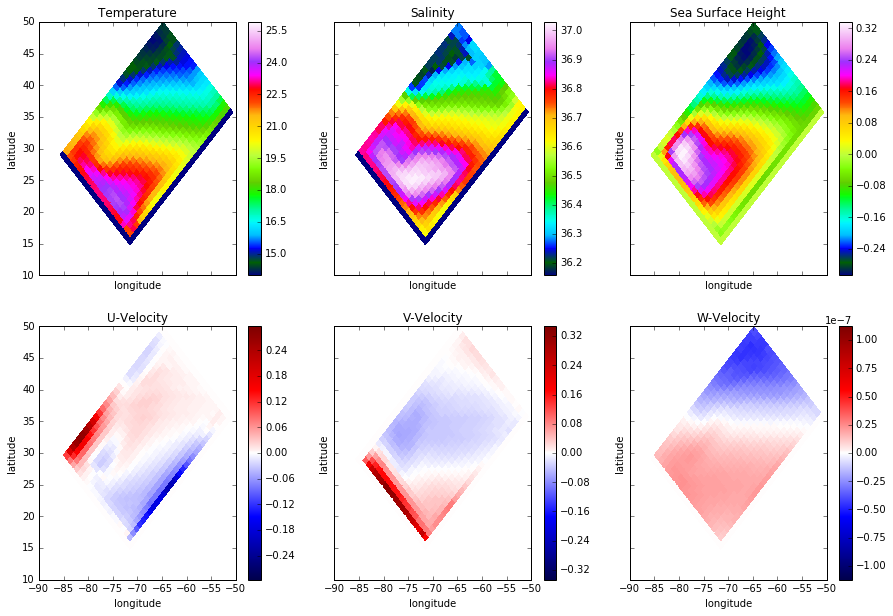

In [5]:
fig, [(ax1,ax2,ax3),(ax4,ax5,ax6)] = plt.subplots(2,3,figsize=(15,10),sharex=True, sharey=True)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
varb = [tem, sal, ssh, U, V, W]
ttls = ['Temperature', 'Salinity', 'Sea Surface Height', 'U-Velocity', 'V-Velocity', 'W-Velocity']
dep_ind = 0
frames = 71
file_name = 'Gyre_TestRun.mp4'

animate_gyre(fig, axes, varb, ttls, dep_ind, frames, file_name)

In [137]:
dep

<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (31,)
filling off

In [121]:
x = np.linspace(0,3,33)
y = np.linspace(0,2,22)
z = np.ones((len(y),len(x)))* -1000
for indx in np.arange(10,25):
    for indy in np.arange(5,15):
        z[indy, indx] = -2300
z[-1,:] = 0

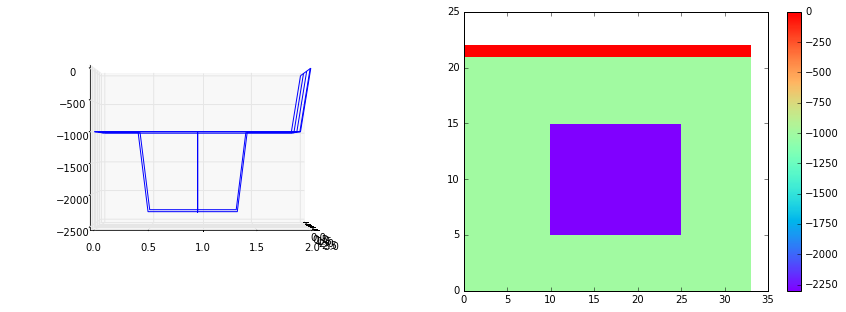

In [122]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_wireframe(X, Y, z, rstride=10, cstride=10)
ax.view_init(elev=0, azim=0)

ax = fig.add_subplot(1, 2, 2)
p = ax.pcolor(z, cmap=cm.rainbow)
fig.colorbar(p)

bathy files have **variables (dimensions)**: float64 nav_lon(y,x), float64 nav_lat(y,x), float64 Bathymetry(y,x)

In [2]:
from netCDF4 import Dataset

In [3]:
test_dataset = Dataset('bathy_rectangle.nc', 'w')

bathy = test_dataset.createVariable('Bathymetry', np.float64)
bathy.units = 'm'

In [4]:
test_dataset.variables

OrderedDict([('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
              float64 Bathymetry()
                  units: m
              unlimited dimensions: 
              current shape = ()
              filling on, default _FillValue of 9.969209968386869e+36 used)])

In [5]:
test_this = np.arange(-90,91,1)
bathy[:] = test_this

IndexError: size of data array does not conform to slice

In [6]:
test_this.shape

(181,)

In [7]:
bathy.shape

()

http://www.ceda.ac.uk/static/media/uploads/ncas-reading-2015/11_create_netcdf_python.pdf